## Einlesen von Daten


In [1]:
import numpy as np

with open ('Measurements/kalorimeter/mix.txt','r') as myfile:
    data=myfile.read().replace(',','.').replace('\n',',').replace('	',',')

datarray = data.split(',')
array = np.array([float(i) for i in datarray[:-1]])

In [2]:
with open ('Measurements/kalorimeter/hotwater.txt','r') as myfile:
    data=myfile.read().replace(',','.').replace('\n',',').replace('	',',')

hotarray = data.split(',')
hotwater = np.array([float(i) for i in hotarray[:-1]])

In [3]:
with open ('Measurements/kalorimeter/icewater','r') as myfile:
    data=myfile.read().replace(',','.').replace('\n',',').replace('	',',')

coldarray = data.split(',')
icewater = np.array([float(i) for i in coldarray[:-1]])

In [4]:
with open ('Measurements/solid/solid_2_cooldown_process','r') as myfile:
    data=myfile.read().replace(',','.').replace('\n',',').replace('	',',')

obj = data.split(',')
obj = np.array([float(i) for i in obj[:-1]])

In [64]:
with open ('Measurements/solid/water_kalorimeter2','r') as myfile:
    data=myfile.read().replace(',','.').replace('\n',',').replace('	',',')

water = data.split(',')
water = np.array([float(i) for i in water[:-1]])

## Plotten von Daten

Die Zeit unserer Mischtemperatur betraegt mathematisch entweder 1.9579758659372164 -0.07020235395331535
Der naechste Wert an t_m1 ist 1.9375


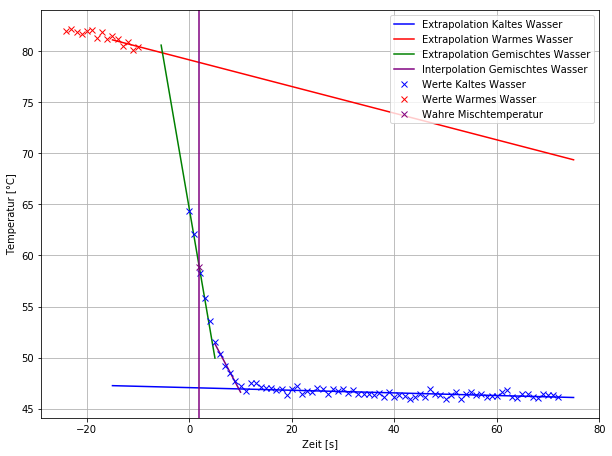

Unsere Mischungstemperatur ist 58.88715026780611


In [6]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

t_in=array[10::2]-array[10]
T=array[11::2]

a_m,b_m,c_m=np.polyfit(t_in[:12],T[:12],2)
x_polyfit=np.linspace(-4,12,25)
T_polyfit=a_m*(x_polyfit**2)+b_m*x_polyfit+c_m

x=np.linspace(-15,75,250)

a_l,b_l=np.polyfit(t_in[13:],T[13:],1)
l_fit=a_l*x+b_l

t_in2=hotwater[0::2]-hotwater[0]
T2=hotwater[1::2]
t_in2_=t_in2-t_in2[-1]-10

a_h,b_h=np.polyfit(t_in2_,T2,1)
h_fit=a_h*x+b_h

a_m1,b_m1=np.polyfit(t_in[:4],T[:4],1)
x_m1=np.linspace(-5.5,5,25)
T_m1=a_m1*x_m1+b_m1

a_m2,b_m2=np.polyfit(t_in[5:10],T[5:10],1)
x_m2=np.linspace(5,10,25)
T_m2=a_m2*x_m2+b_m2

plt.plot(x,l_fit,label='Extrapolation Kaltes Wasser',color="blue")
plt.plot(x,h_fit,label='Extrapolation Warmes Wasser',color="red")
plt.plot(x_m1,T_m1,label='Extrapolation Gemischtes Wasser',color="green")
plt.plot(x_m2,T_m2,label='Interpolation Gemischtes Wasser',color="purple")
plt.plot(t_in,T,'x',label='Werte Kaltes Wasser',color="blue")
plt.plot(t_in2_,T2,'x',label='Werte Warmes Wasser',color="red")
plt.grid()
plt.ylabel('Temperatur [°C]')
plt.xlabel('Zeit [s]')
t_1=t_in[5]
t_2=(b_m2-b_l)/(a_l-a_m2)
T_m2int=(a_m2/2)*(t_2**2-t_1**2)+b_m2*(t_2-t_1)
T_lint=(a_l/2)*(t_2**2-t_1**2)+b_l*(t_2-t_1)
F_add=T_m2int-T_lint
t_0=(b_m1-b_h)/(a_h-a_m1)

A=a_l/2-a_h/2
B=b_l-b_h
C=a_m*(t_1**2)/2+b_m*t_1-a_l*(t_1**2)/2-b_l*t_1+F_add+a_h*(t_0**2)/2+b_h*t_0-(a_m/2)*t_0**2-b_m*t_0

t_m1=(-B+np.sqrt(B**2-4*A*C))/2*A
t_m2=(-B-np.sqrt(B**2-4*A*C))/2*A
print('Die Zeit unserer Mischtemperatur betraegt mathematisch entweder',t_m1,t_m2)

print('Der naechste Wert an t_m1 ist',x_m1[17])

T_m1v=T_m1[17]
#T_m2v=T_m1[13]

plt.plot(t_m1,T_m1v,'x',label='Wahre Mischtemperatur',color="purple")
#plt.plot(t_m2,T_m2v,'x',label='2. "Wahre" Mischtemperatur',color="orange")
fig_size=plt.rcParams["figure.figsize"]
fig_size[0]=10
fig_size[1]=7.5
plt.rcParams["figure.figsize"]=fig_size
plt.legend(loc=1)
plt.axvline(t_m1,color="purple")
plt.savefig(fname='/home/a/Documents/uni/AP1/git/Praktikum-A1/3_31/Graph_Mix_Kali.png',dpi=300)
plt.show()
print('Unsere Mischungstemperatur ist',T_m1v)

## Berechnung Waermekapazitaet von Wasser

In [7]:
from uncertainties import ufloat

c_w=4182

def beta(T_M,T_K,T_H):
    return (T_M-T_K)/(T_H-T_M)

def C_Kal(m_K,T_M,T_K,T_H,m_H):
    return (c_w*(m_K*beta(T_M,T_K,T_H)-m_H))

m_k=ufloat(0.22180,0.00005)
m_h=ufloat(0.33984,0.00005)
T_m=58.89
T_k=ufloat(array[9],1)
T_h=ufloat(h_fit[25],1)
print(T_k,T_h)

print(C_Kal(m_k,T_m,T_k,T_h,m_h))

22.3+/-1.0 79.9+/-1.0
(1.9+/-0.9)e+02


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


[[2.61175814e+02 2.89963402e-12]]
[[2.60023863e+02 2.88684480e-12]]
44.61822467701009
45.01061669965564
44.234803033186154
Die Temperatur des Messkoerpers vor dem Mischen ist 71.97014451621692
Die Temperatur des Messkoerpers nach dem Mischen ist 53.30071806360439


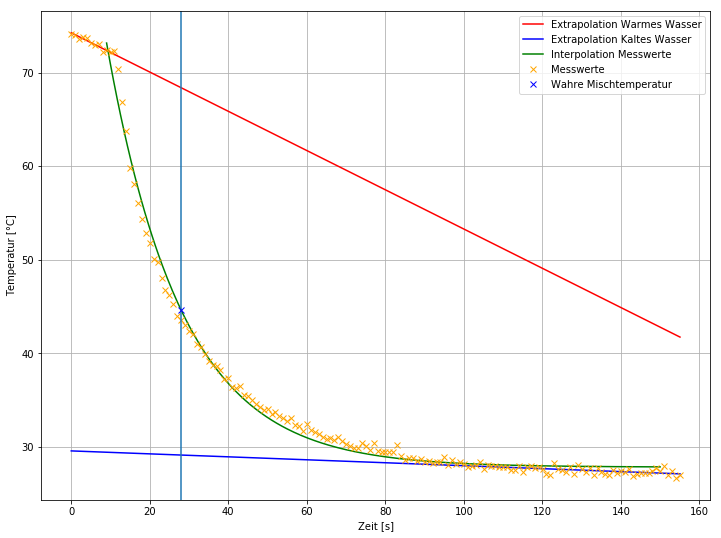

In [63]:
from scipy import interpolate

def fitfunc(t,y_0,y_1,k):
    return y_0+y_1*np.exp(-k*t)

t_in=obj[0::2]-obj[0]
T_in=obj[1::2]

T_in_h=T_in[:10]
t_in_h=t_in[:10]

x=np.linspace(0,t_in[-1],320)
x_e=np.linspace(9,150,320)

#spl=interpolate.splrep(t_in,T_in,s=0)

#ynew=interpolate.splev(x,spl,der=0)

popt,pvoc=curve_fit(fitfunc,t_in[11:],T_in[11:])#,method='dogbox')
y_0,y_1,k=popt
ynew2=fitfunc(x_e,y_0,y_1,k)

a_h,b_h=np.polyfit(t_in_h,T_in_h,1)
fit_h=a_h*x+b_h

a_l,b_l=np.polyfit(t_in[100:],T_in[100:],1)
fit_l=a_l*x+b_l

plt.plot(x,fit_h,label='Extrapolation Warmes Wasser',color="red")
plt.plot(x,fit_l,label='Extrapolation Kaltes Wasser',color='blue')
plt.plot(x_e,ynew2,color='green',label='Interpolation Messwerte')
plt.plot(t_in,T_in,'x',label='Messwerte',color="orange")
plt.grid()
plt.ylabel('Temperatur [°C]')
plt.xlabel('Zeit [s]')

#from sympy.solvers import solve
#from sympy import Symbol
#import sympy as sp

def equm(t_):
    return y_0+y_1*np.exp(-k*t_)

def equh(t__):
    return a_h*t__+b_h

def equl(t___):
    return a_l*t___+b_l

#x=Symbol('x')
a,b,c=y_0,y_1,k

t_h=11
t_l=100
#eq=a*t_h-(b/c)*sp.exp(-c*t_h)-a*x+(b/c)*sp.exp(-c*x)-0.5*a_l*t_l**2-b_l*t_l+0.5*x**2+b_l*x-(0.5*a_h*x**2+0.5*a_h*x-0.5*a_h*t_h**2-0.5*a_h*t_h**2-a*x*(b/c)*sp.exp(-c*x)+a*t_h*(b/c)*sp.exp(-c*t_h))
#t_m=solve(eq,x)       
#print(t_m)

#x_=np.linspace(0,100,320)
#def equ(_x):
#    return eq=a*t_h-(b/c)*np.exp(-c*t_h)-a*_x+(b/c)*np.exp(-c*_x)-0.5*a_l*t_l**2-b_l*t_l+0.5*x**2+b_l*_x-(0.5*a_h*_x**2+0.5*a_h*_x-0.5*a_h*t_h**2-0.5*a_h*t_h**2-a*_x*(b/c)*np.exp(-c*_x)+a*t_h*(b/c)*np.exp(-c*t_h))

import scipy.integrate as integrate



#print(a,a_h,a_l,b,b_h,b_l,c,t_h,t_l)
#print(a*t_h-(b/c)*np.exp(-c*t_h)-a*_x+(b/c)*np.exp(-c*_x)-0.5*a_l*t_l**2-b_l*t_l+0.5*x**2+b_l*_x-(0.5*a_h*_x**2+0.5*a_h*_x-0.5*a_h*t_h**2-0.5*a_h*t_h**2-a*_x*(b/c)*np.exp(-c*_x)+a*t_h*(b/c)*np.exp(-c*t_h)))

#plt.plot(x_,equ(x_),color='purple')

#print(equ(29))

t_m=28
intl1=integrate.quad(equm,t_m,t_l)
intl2=integrate.quad(equl,t_m,t_l)
inth1=integrate.quad(equm,t_h,t_m)
inth2=integrate.quad(equh,t_h,t_m)

print(np.array([intl1])-np.array([intl2]))
print(np.array([inth2])-np.array([inth1]))
plt.axvline(t_m)
plt.plot(t_m,y_0+y_1*np.exp(-k*x_e[43]),'x',color='blue',label='Wahre Mischtemperatur')
print(y_0+y_1*np.exp(-k*x_e[43]))
print(y_0+y_1*np.exp(-k*x_e[42]))
print(y_0+y_1*np.exp(-k*x_e[44]))
print('Die Temperatur des Messkoerpers vor dem Mischen ist',a_h*t_h+b_h)
print('Die Temperatur des Messkoerpers nach dem Mischen ist',a_h*t_l+b_h)
#plt.plot(t_m1,T_m1v,'x',label='Wahre Mischtemperatur',color="purple")
#plt.plot(t_m2,T_m2v,'x',label='2. "Wahre" Mischtemperatur',color="orange")
#plt.plot()
fig_size=plt.rcParams["figure.figsize"]
fig_size[0]=12
fig_size[1]=9
plt.rcParams["figure.figsize"]=fig_size
plt.legend(loc=1)
#plt.axvline(t_m1,color="purple")
plt.savefig(fname='/home/a/Documents/uni/AP1/git/Praktikum-A1/3_31/Graph_Mix_Obj.png',dpi=300)
plt.show()
#print('Unsere Mischungstemperatur ist',T_m1v)

In [ ]:
with open ('Measurements/solid/solid_2_cooldown_process','r') as myfile:
    data=myfile.read().replace(',','.').replace('\n',',').replace('	',',')
obj = data.split(',')
obj = np.array([float(i) for i in obj[:-1]])

def eulfunc(t,a,b,c):
    return a+b*np.exp(-c*t)

t_in=obj[0::2]-obj[0]
T_in=obj[1::2]

t_in_=t_in[11:]
T_in_=T_in[11:]

x=np.linspace(0,155,300)

popt,pvoc=curve_fit(eulfunc,t_in_[:80],T_in_[:80])
a,b,c=popt
y=eulfunc(x,a,b,c)

x_=np.linspace(0,155,300)
y_=eulfunc(x_,a,b,c)

a_p,b_p,c_p,d_p=np.polyfit(t_in_,T_in_,3)
fit_p=a_p*x**3+b_p*x**2+c_p*x+d_p

#plt.plot(x,fit_p)
#plt.plot(x,y,color='red')
plt.plot(t_in_,T_in_)
plt.plot(x_,y_)
plt.show()

In [71]:
def beta(T_m,T_f,T_k):
    return (T_m-T_f)/(T_k-T_m)

def c_k(m_f,c_f,c_kal,m_k,T_m,T_f,T_K):
    return beta(T_m,T_f,T_K)*(m_f*c_f+c_kal)/m_k
                
m_F=ufloat(337.07,0.05)
T_M=ufloat(45.0,0.4)
m_K=ufloat(71.33,0.05)
T_K=ufloat(71.97,0.4)
T_F=ufloat(sum(water[1::2])/len(water[1::2]),0.4)
C_Kal=ufloat(190000,90)
c_F=4.182
print(T_F)

print(c_k(m_F,c_F,C_Kal,m_K,T_M,T_F,T_K))

20.0+/-0.4
(2.49+/-0.09)e+03
